In [3]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [20]:
#Image data directories
image_dir_training = ".\\day_night_images\\training\\"
image_dir_test = ".\\day_night_images\\test\\"

In [26]:
import os
import glob # library for loading images from a directory
def load_dataset(image_dir):
    #Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    #Iterate thru each color folder
    for im_type in image_types:
        #Iterate thru each image file in each image_type folder
        #glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            im = mpimg.imread(file)
            
            if not im is None:
                im_list.append((im, im_type))
    return im_list

In [27]:
#Load images useing load_dataset function in helpers.py
IMAGE_LIST = load_dataset(image_dir_training)

# Visualize the input images

Shape: (458, 800, 3)
Label: day


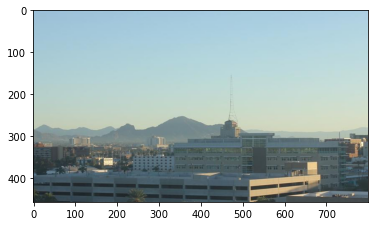

In [31]:
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

plt.imshow(selected_image)
print("Shape: {}".format(selected_image.shape))
print("Label: {}".format(selected_label))

# Preprocess Data

In [33]:
#Standardize the images

def standardize_input(image): 
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

In [34]:
#Stardardize the output: binary numberical values 0/1=night/day

def encode(label):
    numerical_val = 0
    if(label == "day"):
        numerical_val = 1 #otherwise it is night and can stay as 0
    return numerical_val

In [36]:
def standardize(image_list):
    standard_list = []
    
    for item in image_list:
        image = item[0]
        label = item[1]
        
        standardized_im = standardize_input(image)
        
        binary_label = encode(label)
        
        standard_list.append((standardized_im, binary_label))
        
    return standard_list
STANDARDIZED_LIST = standardize(IMAGE_LIST)

# Visualize the standardized data

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


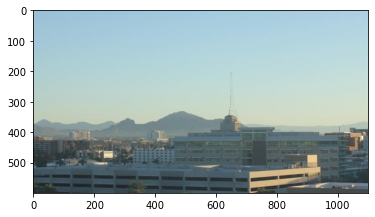

In [45]:
# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))